In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler, MinMaxScaler

pd.set_option('display.max_columns', None)

print("Pandas version: ", pd.__version__)
print("Numpy version: ", np.__version__)
print("Scikit-learn version: ", sklearn.__version__)

Pandas version:  2.2.2
Numpy version:  1.26.4
Scikit-learn version:  1.4.2


In [3]:
train_data = pd.read_csv("train_FD001.txt",sep=r"\s+", header=None, engine='python')
train_data.shape

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Devasvi Zode\AppData\Local\Temp\ipykernel_24424\1756636880.py:1: SyntaxWarning: invalid escape sequence '\s'
  train_data = pd.read_csv("train_FD001.txt",sep = "\s", header = None)
C:\Users\Devasvi Zode\AppData\Local\Temp\ipykernel_24424\1756636880.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data = pd.read_csv("train_FD001.txt",sep = "\s", header = None)


(20631, 26)

In [4]:
train_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [5]:
#number of unique engines
np.unique(train_data[0])

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100], dtype=int64)

In [6]:
#after how many cycles does each engine fail
num_cycles_to_failure = train_data.groupby(0)[1].count()
num_cycles_to_failure.values

array([192, 287, 179, 189, 269, 188, 259, 150, 201, 222, 240, 170, 163,
       180, 207, 209, 276, 195, 158, 234, 195, 202, 168, 147, 230, 199,
       156, 165, 163, 194, 234, 191, 200, 195, 181, 158, 170, 194, 128,
       188, 216, 196, 207, 192, 158, 256, 214, 231, 215, 198, 213, 213,
       195, 257, 193, 275, 137, 147, 231, 172, 185, 180, 174, 283, 153,
       202, 313, 199, 362, 137, 208, 213, 213, 166, 229, 210, 154, 231,
       199, 185, 240, 214, 293, 267, 188, 278, 178, 213, 217, 154, 135,
       341, 155, 258, 283, 336, 202, 156, 185, 200], dtype=int64)

In [7]:
engine_1_linear_degradation_model = np.arange(192-1, -1, -1)

# Piecewise_linear_degradation model
early_rul = 125
engine_1_piecewise_linear_degradation_model = np.append(early_rul*np.ones(shape = (192-early_rul,)),
                                                        np.arange(early_rul-1, -1, -1))

print("Linear degradation model shape (for engine 1): ", engine_1_linear_degradation_model.shape)
print("Piecewise linear degradation model shape (for engine 1): ", engine_1_piecewise_linear_degradation_model.shape)

Linear degradation model shape (for engine 1):  (192,)
Piecewise linear degradation model shape (for engine 1):  (192,)


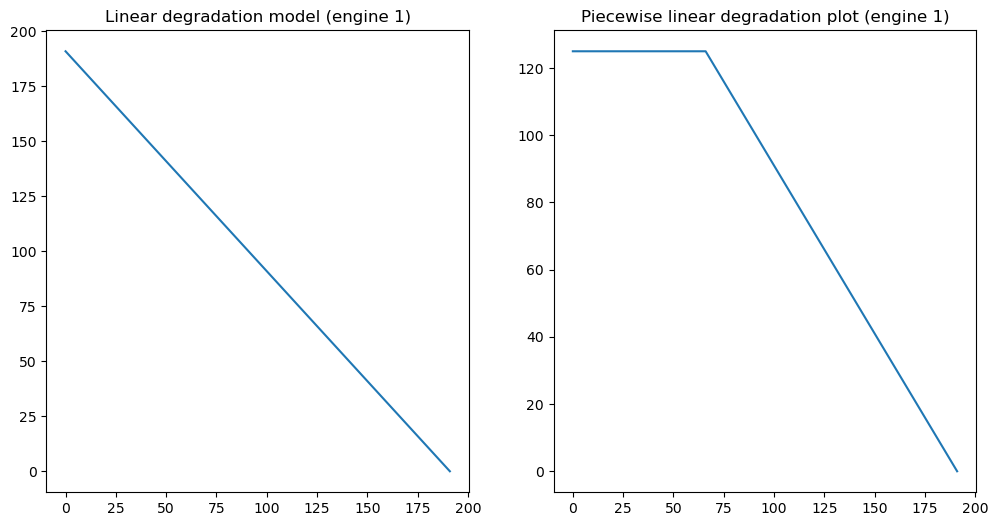

In [8]:
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.plot(engine_1_linear_degradation_model)
plt.title("Linear degradation model (engine 1)")
plt.subplot(122)
plt.plot(engine_1_piecewise_linear_degradation_model)
plt.title("Piecewise linear degradation plot (engine 1)")
plt.show()

In [9]:
/*Observe that while the linear degradation curve starts at 191 and ends at 0, piecewise linear degradation curve starts at 125, stays at 125 for some time and then linearly degrades to 0.

We can similarly find RUL values for other engines. But individually finding RUL for each engine is boring. So we will write a function that automatically finds RUL values for both models if it is supplied with the total number of cycles.*/

SyntaxError: invalid syntax (175365986.py, line 1)

In [27]:
def process_targets(data_length, early_rul = None):
    """ 
    Takes datalength (i.e., total number of cycles for each engine) and early_rul as input and 
    creates target rul.
    
    Arguments:
        data_length: (scaler) Number of cycles for each engine
        early_rul: (scaler) Early RUL value to be set. When set to `None`, linear degradation
                   curve is used. (deafult: None)

    Returns:
        target_array: (1D float array) Target array
    """
    if early_rul == None:
        return np.arange(data_length-1, -1, -1)
    else:
        early_rul_duration = data_length - early_rul
        if early_rul_duration <= 0:    # This condition is needed when early rul is larger than data_length of an engine
            target_array = np.arange(data_length-1, -1, -1)
            return target_array
        else:
            target_array = np.append(early_rul*np.ones(shape = (early_rul_duration,)), np.arange(early_rul-1, -1, -1))
            return target_array

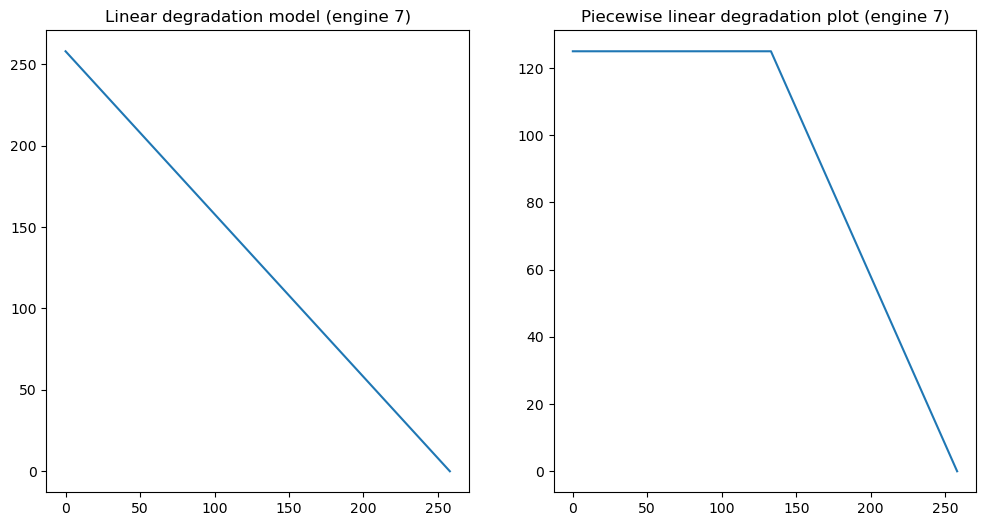

In [29]:
engine_7_linear_degradation_rul = process_targets(259, early_rul = None)
engine_7_piecewise_linear_degradation_rul = process_targets(259, early_rul = 125)
plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.plot(engine_7_linear_degradation_rul)
plt.title("Linear degradation model (engine 7)")
plt.subplot(122)
plt.plot(engine_7_piecewise_linear_degradation_rul)
plt.title("Piecewise linear degradation plot (engine 7)")
plt.show()

In [31]:
true_rul = pd.read_csv('RUL_FD001.txt', sep=r"\s+", header=None, engine='python')
true_rul[0].values

array([112,  98,  69,  82,  91,  93,  91,  95, 111,  96,  97, 124,  95,
       107,  83,  84,  50,  28,  87,  16,  57, 111, 113,  20, 145, 119,
        66,  97,  90, 115,   8,  48, 106,   7,  11,  19,  21,  50, 142,
        28,  18,  10,  59, 109, 114,  47, 135,  92,  21,  79, 114,  29,
        26,  97, 137,  15, 103,  37, 114, 100,  21,  54,  72,  28, 128,
        14,  77,   8, 121,  94, 118,  50, 131, 126, 113,  10,  34, 107,
        63,  90,   8,   9, 137,  58, 118,  89, 116, 115, 136,  28,  38,
        20,  85,  55, 128, 137,  82,  59, 117,  20], dtype=int64)

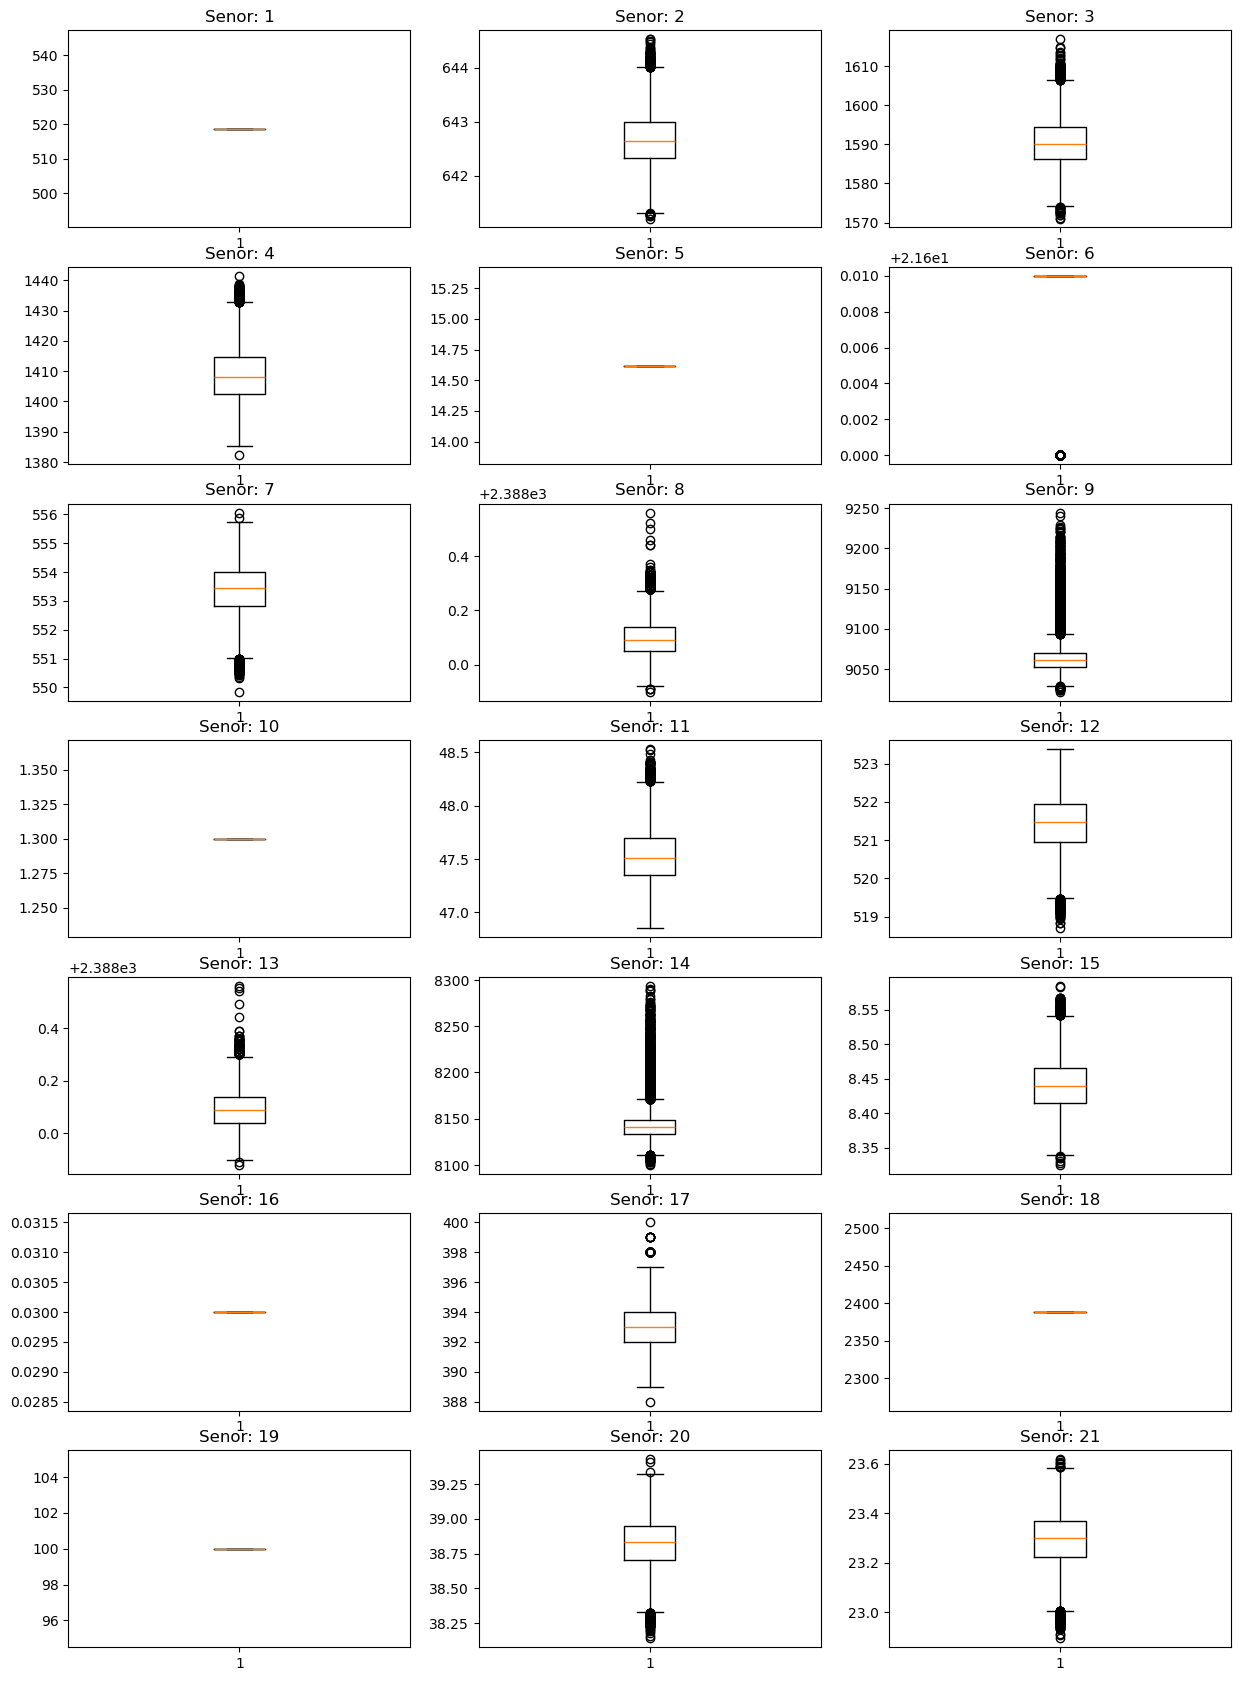

In [33]:
plt.figure(figsize = (15, 21))
for i in np.arange(5, 26):        # column 5 in python means actual 6th column
    temp = train_data.iloc[:, i]
    plt.subplot(7,3, i-4)
    plt.boxplot(temp)
    plt.title("Senor: "+ str(i-4))
plt.show()

In [35]:
train_data[10].value_counts()

10
21.61    20225
21.60      406
Name: count, dtype: int64

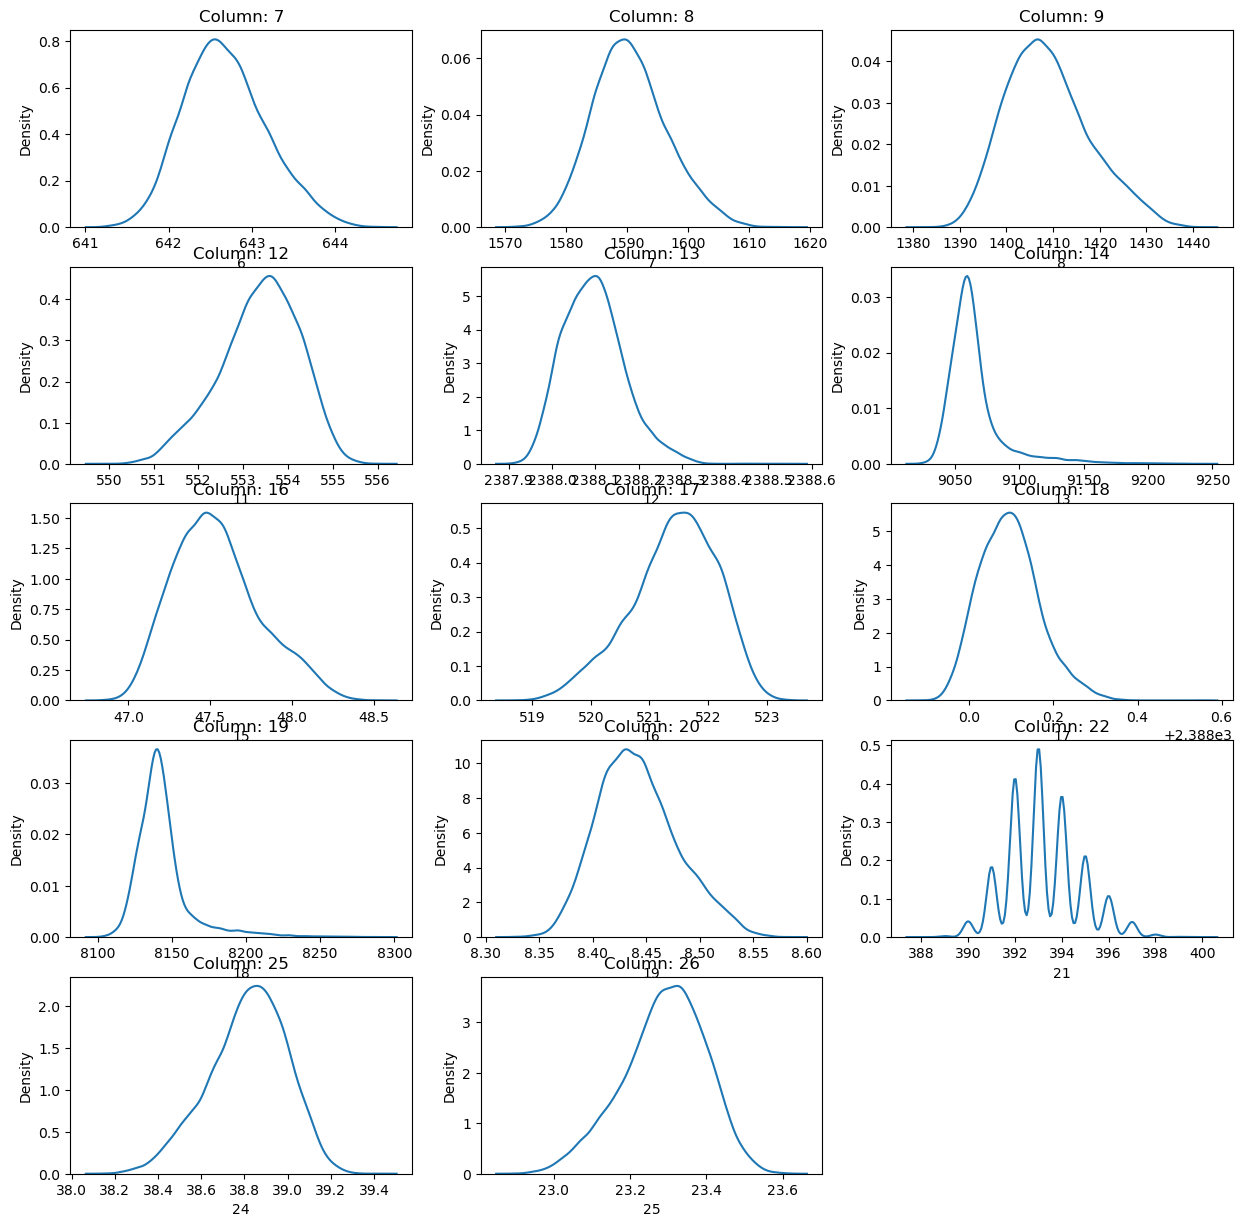

In [37]:
#density plot 
plt.figure(figsize = (15, 21))
for i,j in enumerate([6, 7, 8, 11, 12, 13, 15, 16, 17, 18, 19, 21, 24, 25]):
    temp = train_data.iloc[:, j]
    plt.subplot(7,3, i+1)
    sns.kdeplot(temp, legend = False)
    plt.title("Column: "+ str(j+1))
plt.show()

In [39]:
test_data = pd.read_csv("test_FD001.txt", sep=r"\s+", header=None, engine='python')
test_data.shape

(13096, 26)

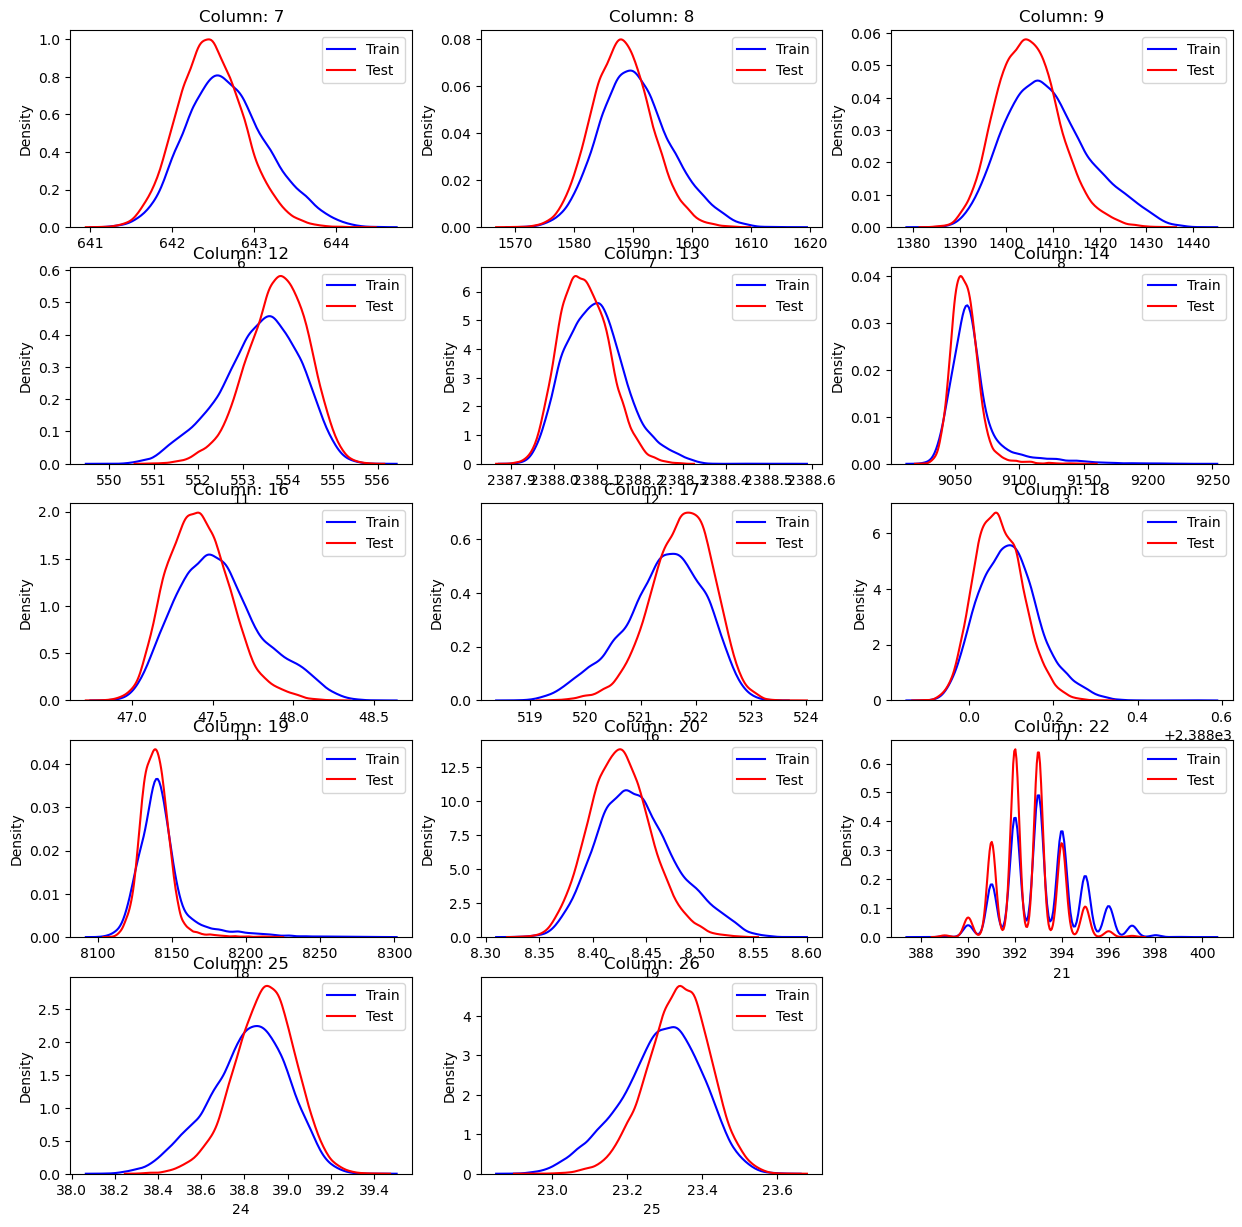

In [41]:
#density plot of training as well as test data
plt.figure(figsize = (15, 21))
for i,j in enumerate([6, 7, 8, 11, 12, 13, 15, 16, 17, 18, 19, 21, 24, 25]):
    temp_train = train_data.iloc[:, j]
    temp_test = test_data.iloc[:, j]
    plt.subplot(7,3, i+1)
    sns.kdeplot(temp_train, legend = False, color = "blue", label = "Train")
    sns.kdeplot(temp_test, legend = False, color = "red", label = "Test")
    plt.title("Column: "+ str(j+1))
    plt.legend()
plt.show()

In [43]:
def process_input_data_with_targets(input_data, target_data = None, window_length = 1, shift = 1):
    """
    Depending on values of window_length and shift, this function generates batchs of data and targets 
    from `input_data` and `target_data`. `target_data` is optional. If no `target_data` is given, i.e., 
    `target_data = None`, no `output_targets` are generated. The following formula is used to determine
    number of batches. Please note that, here we use the term `batch` in a different sense than its usual
    meaning in deep learning.  
    
    Number of batches = int(np.floor((len(input_data) - window_length)/shift)) + 1
    
    **We don't check input dimensions using exception handling. So readers should be careful while using these
    functions. If input data are not of desired dimension, either error occurs or something undesirable is 
    produced as output.**
    
    Arguments:
        input_data: (Must be 2D array) input data to function 
        target_data (optional): (Must be 1D array) Input rul values (default: None)
        window_length: (scalar) window length of data (default: 1)
        shift: (scalar) Distance by which the window moves for next batch. This is closely related to overlap
               between data. For example, if window length is 30 and shift is 1, there is an overlap of 
               29 data points between two consecutive batches (default: 1)
        
    Returns:
        output_data: (2D float array) Output data that would be passed to machine learning model
        output_targets (optional): (1D float array) Output targets. Only generated if `target_data` is
                                   passed as argument.
    """
    num_batches = int(np.floor((len(input_data) - window_length)/shift)) + 1
    num_features = input_data.shape[1]
    output_data = np.repeat(np.nan, repeats = num_batches * window_length * num_features).reshape(num_batches, window_length,
                                                                                                  num_features)
    if target_data is None:
        for batch in range(num_batches):
            output_data[batch,:,:] = input_data[(0+shift*batch):(0+shift*batch+window_length),:]
        return output_data
    else:
        output_targets = np.repeat(np.nan, repeats = num_batches)
        for batch in range(num_batches):
            output_data[batch,:,:] = input_data[(0+shift*batch):(0+shift*batch+window_length),:]
            output_targets[batch] = target_data[(shift*batch + (window_length-1))]
        return output_data, output_targets

In [45]:
data = np.array([[1,2,3,4,5],
                 [6,7,8,9,10],
                 [11,12,13,14,15],
                 [16,17,18,19,20],
                 [21,22,23,24,25],
                 [26,27,28,29,30]])
ruls = np.array([31,32,33,34,35,36])
print("Data:")
print(data)
print()
print("RUL:")
print(ruls)

Data:
[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]
 [16 17 18 19 20]
 [21 22 23 24 25]
 [26 27 28 29 30]]

RUL:
[31 32 33 34 35 36]


In [47]:
check_data, check_rul = process_input_data_with_targets(data,target_data = ruls, window_length = 3, shift = 1)
print(check_data)
print()
print(check_rul)

[[[ 1.  2.  3.  4.  5.]
  [ 6.  7.  8.  9. 10.]
  [11. 12. 13. 14. 15.]]

 [[ 6.  7.  8.  9. 10.]
  [11. 12. 13. 14. 15.]
  [16. 17. 18. 19. 20.]]

 [[11. 12. 13. 14. 15.]
  [16. 17. 18. 19. 20.]
  [21. 22. 23. 24. 25.]]

 [[16. 17. 18. 19. 20.]
  [21. 22. 23. 24. 25.]
  [26. 27. 28. 29. 30.]]]

[33. 34. 35. 36.]


In [49]:
check_data_2, check_rul_2 = process_input_data_with_targets(data,target_data = ruls, window_length = 3, shift = 2)
print(check_data_2)
print()
print(check_rul_2)

[[[ 1.  2.  3.  4.  5.]
  [ 6.  7.  8.  9. 10.]
  [11. 12. 13. 14. 15.]]

 [[11. 12. 13. 14. 15.]
  [16. 17. 18. 19. 20.]
  [21. 22. 23. 24. 25.]]]

[33. 35.]


In [51]:
check_data_new = process_input_data_with_targets(data, target_data = None, window_length = 4, shift = 1)
check_data_new

array([[[ 1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10.],
        [11., 12., 13., 14., 15.],
        [16., 17., 18., 19., 20.]],

       [[ 6.,  7.,  8.,  9., 10.],
        [11., 12., 13., 14., 15.],
        [16., 17., 18., 19., 20.],
        [21., 22., 23., 24., 25.]],

       [[11., 12., 13., 14., 15.],
        [16., 17., 18., 19., 20.],
        [21., 22., 23., 24., 25.],
        [26., 27., 28., 29., 30.]]])

In [53]:
def process_test_data(test_data_for_an_engine, window_length, shift, num_test_windows = 1):
    """ 
    This function takes test data for an engine as first input. The next two inputs,
    window_length and shift are same as other functions. 
    
    Finally it takes num_test_windows as the last input. num_test_windows sets how many examples we
    want from test data (from last). By default it extracts only the last example.
    
    The function returns last examples and number of last examples (a scaler) as output. 
    We need the second output later. If we are extracting more than 1 last examples, we have to 
    average their prediction results. The second scaler helps us do just that.

    Arguments:
        test_data_for_an_engine: (2D array) input test data
        window_length: (scalar) window length of data
        shift: (scalar) Distance by which the window moves for next batch. This is closely related to overlap
               between data. For example, if window length is 30 and shift is 1, there is an overlap of 
               29 data points between two consecutive batches.
        num_test_windows: (scalar) Number of examples to take from last. (default: 1)

    Returns:
        batched_test_data_for_an_engine: (2D array) Batched test data. Please note that, here we have used the term `batch`
                                         in a different sense than its usual meaning in deep learning.
        extracted_num_test_windows: (scalar) Extracted number of test examples from last. If `num_test_windows` number of
                                    examples can't be extracted from test data, in that case `extracted_num_test_windows`
                                    is less than `num_test_windows`. 
    """
    max_num_test_batches = int(np.floor((len(test_data_for_an_engine) - window_length)/shift)) + 1
    if max_num_test_batches < num_test_windows:
        required_len = (max_num_test_batches -1)* shift + window_length
        batched_test_data_for_an_engine = process_input_data_with_targets(test_data_for_an_engine[-required_len:, :],
                                                                          target_data = None,
                                                                          window_length = window_length, shift = shift)
        extracted_num_test_windows = max_num_test_batches
        return batched_test_data_for_an_engine, extracted_num_test_windows
    else:
        required_len = (num_test_windows - 1) * shift + window_length
        batched_test_data_for_an_engine = process_input_data_with_targets(test_data_for_an_engine[-required_len:, :],
                                                                          target_data = None,
                                                                          window_length = window_length, shift = shift)
        extracted_num_test_windows = num_test_windows
        return batched_test_data_for_an_engine, extracted_num_test_windows

In [55]:
check_data = np.reshape(np.arange(24), newshape = (6,4))
check_data

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [57]:
last_examples, num_last_examples = process_test_data(check_data, window_length = 2, shift = 1, num_test_windows= 1)
print(last_examples)
print()
print(num_last_examples)

[[[16. 17. 18. 19.]
  [20. 21. 22. 23.]]]

1


In [59]:
last_examples, num_last_examples = process_test_data(check_data, window_length = 2, shift = 1, num_test_windows= 3)
print(last_examples)
print()
print(num_last_examples)

[[[ 8.  9. 10. 11.]
  [12. 13. 14. 15.]]

 [[12. 13. 14. 15.]
  [16. 17. 18. 19.]]

 [[16. 17. 18. 19.]
  [20. 21. 22. 23.]]]

3


In [61]:
#scaling data
window_length = 30
shift = 1
early_rul = 125             # Set to None for linear degradation model
processed_train_data = []
processed_train_targets = []

# How many test examples to take for each engine. If set to 1 (this is the default), only last example of test data for 
# each engine are taken. If set to a different number, that many examples from last are taken. 
# Final output for an engine will be the average of output of all examples for that engine.
num_test_windows = 1     # Number of examples. Change to a different number to select that many test examples for each engine.
processed_test_data = []
num_test_windows_list = []  # This list keeps track of number of examples for all engines in the test set.

num_machines = np.min([len(train_data[0].unique()), len(test_data[0].unique())])

for i in np.arange(1, num_machines + 1):
    
    temp_train_data = train_data[train_data[0] == i].drop(columns=[0,1,2,3,4,5,9,10,14,20,22,23]).values
    temp_test_data = test_data[test_data[0] == i].drop(columns=[0,1,2,3,4,5,9,10,14,20,22,23]).values
    
    # Verify if data of given window length can be extracted from both training and test data
    if (len(temp_test_data) < window_length):
        print("Test engine {} doesn't have enough data for window_length of {}".format(i, window_length))
        raise AssertionError("Window length is larger than number of data points for some engines. "
                             "Try decreasing window length.")
    elif (len(temp_train_data) < window_length):
        print("Train engine {} doesn't have enough data for window_length of {}".format(i, window_length))
        raise AssertionError("Window length is larger than number of data points for some engines. "
                             "Try decreasing window length.")
    
    # We have used MinMaxScaler. Use a different scaler if you want.
    # Or just comment the following 3 lines if no scaling is required.
    scaler = MinMaxScaler(feature_range = (-1, 1))
    temp_train_data = scaler.fit_transform(temp_train_data)
    temp_test_data = scaler.transform(temp_test_data)    
    
    temp_train_targets = process_targets(data_length = temp_train_data.shape[0], early_rul = early_rul)
    data_for_a_machine, targets_for_a_machine = process_input_data_with_targets(temp_train_data, temp_train_targets, 
                                                                                window_length = window_length, shift = shift)
    
    # Prepare test data
    test_data_for_an_engine, num_windows = process_test_data(temp_test_data, window_length = window_length, shift = shift,
                                                             num_test_windows = num_test_windows)
    
    processed_train_data.append(data_for_a_machine)
    processed_train_targets.append(targets_for_a_machine)
    
    processed_test_data.append(test_data_for_an_engine)
    num_test_windows_list.append(num_windows)

processed_train_data = np.concatenate(processed_train_data)
processed_train_targets = np.concatenate(processed_train_targets)
processed_test_data = np.concatenate(processed_test_data)
true_rul = true_rul[0].values

# Shuffle data
index = np.random.permutation(len(processed_train_targets))
processed_train_data, processed_train_targets = processed_train_data[index], processed_train_targets[index]

In [63]:
print(processed_train_data.shape)
print(processed_train_targets.shape)
print(processed_test_data.shape)
print(true_rul.shape)

(17731, 30, 14)
(17731,)
(100, 30, 14)
(100,)


In [65]:
#scaling whole dataset
train_data = pd.read_csv("train_FD001.txt", sep=r"\s+", header=None, engine='python')
test_data = pd.read_csv("test_FD001.txt", sep=r"\s+", header=None, engine='python')
true_rul = pd.read_csv("RUL_FD001.txt", sep=r"\s+", header=None, engine='python')

window_length = 30
shift = 1
early_rul = 125            
processed_train_data = []
processed_train_targets = []

# How many test windows to take for each engine. If set to 1 (this is the default), only last window of test data for 
# each engine is taken. If set to a different number, that many windows from last are taken. 
# Final output is the average output of all windows.
num_test_windows = 1     
processed_test_data = []
num_test_windows_list = []

columns_to_be_dropped = [0,1,2,3,4,5,9,10,14,20,22,23]

train_data_first_column = train_data[0]
test_data_first_column = test_data[0]

# Scale data for all engines
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data.drop(columns = columns_to_be_dropped))
test_data = scaler.transform(test_data.drop(columns = columns_to_be_dropped))

train_data = pd.DataFrame(data = np.c_[train_data_first_column, train_data])
test_data = pd.DataFrame(data = np.c_[test_data_first_column, test_data])

num_train_machines = len(train_data[0].unique())
num_test_machines = len(test_data[0].unique())

# Process training and test data separately as number of engines in training and test set may be different.
# As we are doing scaling for full dataset, we are not bothered by different number of engines in training and test set.

# Process training data
for i in np.arange(1, num_train_machines + 1):
    temp_train_data = train_data[train_data[0] == i].drop(columns = [0]).values
    
    # Verify if data of given window length can be extracted from training data
    if (len(temp_train_data) < window_length):
        print("Train engine {} doesn't have enough data for window_length of {}".format(i, window_length))
        raise AssertionError("Window length is larger than number of data points for some engines. "
                             "Try decreasing window length.")
        
    temp_train_targets = process_targets(data_length = temp_train_data.shape[0], early_rul = early_rul)
    data_for_a_machine, targets_for_a_machine = process_input_data_with_targets(temp_train_data, temp_train_targets, 
                                                                                window_length = window_length, shift = shift)
    
    processed_train_data.append(data_for_a_machine)
    processed_train_targets.append(targets_for_a_machine)

processed_train_data = np.concatenate(processed_train_data)
processed_train_targets = np.concatenate(processed_train_targets)

# Process test data
for i in np.arange(1, num_test_machines + 1):
    temp_test_data = test_data[test_data[0] == i].drop(columns = [0]).values
    
    # Verify if data of given window length can be extracted from test data
    if (len(temp_test_data) < window_length):
        print("Test engine {} doesn't have enough data for window_length of {}".format(i, window_length))
        raise AssertionError("Window length is larger than number of data points for some engines. "
                             "Try decreasing window length.")
    
    # Prepare test data
    test_data_for_an_engine, num_windows = process_test_data(temp_test_data, window_length = window_length, shift = shift,
                                                             num_test_windows = num_test_windows)
    
    processed_test_data.append(test_data_for_an_engine)
    num_test_windows_list.append(num_windows)

processed_test_data = np.concatenate(processed_test_data)
true_rul = true_rul[0].values

# Shuffle training data
index = np.random.permutation(len(processed_train_targets))
processed_train_data, processed_train_targets = processed_train_data[index], processed_train_targets[index]

print("Processed training data shape: ", processed_train_data.shape)
print("Processed training rul shape: ", processed_train_targets.shape)
print("Processed test data shape: ", processed_test_data.shape)
print("True RUL shape: ", true_rul.shape)

Processed training data shape:  (17731, 30, 14)
Processed training rul shape:  (17731,)
Processed test data shape:  (100, 30, 14)
True RUL shape:  (100,)
